# 주피터노트북 수많은 셀 중, 딱! 하나만 파일로 저장하기!

주피터노트북에서 파이썬으로 프로그래밍을 하다보면 반복되는 코드를 재사용하기 쉽게 함수로 만들게 됩니다.  

이런 함수들을 보통 한 셀에 몰아넣고, 다른 셀에서는 이 함수들을 호출하면서 프로그램을 짜는 일이 많죠.  

그런데 함수의 내용이 길어지면 주피터노트북의 길이가 길어지게 되고, 프로그램의 큰 흐름을 만드는 코드에 대한 가독성이 떨어지는 때도 생깁니다.  


그럴 때 사용할 수 있는 방법은 셀을 파일로 분리해서 저장한 다음 다시 import 하는 것입니다.

## 복잡한 프로그램이라고 가정하고 아래 코드를 보세요

In [154]:
# %%writefile func_module.py

def func0():
    return "init_value"

def func1(x):
    return pow(x,x)

def func2(x):
    return x % 1111

def func3(x):
    return x % 109 + 85

def func4(x):
    return x % 214 - 37

def func5(x):
    return (x % 325) * 3 + 31

def func6(x):
    return x % 777 -126

def func7():
    pass

def func8():
    pass

Writing func_module.py


In [155]:
ascii_value = sum(map(lambda a: ord(a), func0()))
ascii_value

1072

In [156]:
pow_value = func1(ascii_value)

In [157]:
remainder = func2(pow_value)

In [158]:
chr(func3(remainder)) + chr(func4(remainder)) + chr(func5(remainder)) + chr(func6(remainder))

'love'

이 코드는 어떤 코드냐 하면요.  

func0()이 최초값인 "init_value" 를 만들어내고,  
그 init_value의 각 글자들을 아스키코드값으로 치환해서 모두 합한 다음에,  
그 값에다 또 다른 함수들을 적용해서 이런 저런 과정을 거친 뒤에 최종적으로는 "love" 라는 문자열을 만들어 내는 코드입니다.

아무 의미도 없는 코드이니 코드를 분석하려고 하지는 마시고, 방금 짜놓은 코드 전체의 흐름을 느껴보세요.

## 코드의 흐름을 느껴보세요. 마치 포스처럼

위의 코드들을 보면 함수 정의하는 부분만 26줄입니다.  
그에 반해서 실제로 값들을 처리하는 코드의 흐름은 5줄에 불과하죠?  

만약 어떤 프로그램의 코드가 이것보다 훨씬 다양하고 복잡한 함수들을 정의하면서 만들어진다고 하면  
앞에서 26줄 짜리는 1000줄, 10000줄이 될 수도 있는 것입니다.  

식은땀이 나죠? 10000줄이 넘으면 마우스 휠을 아무리 돌려도 끝을 보기 어려우니까요.

이런 문제가 있다면 함수를 정의하는 부분을 숨기면 되지 않을까요?  
맞습니다. 그런데 어떻게?  

주피터 노트북에서 셀을 숨기는 방법도 있습니다만 일일이 클릭해 줘야하고,  
그 안에 있는 코드들을 다른 파일에서 사용해보고 싶으면 코드를 복사해서 옮겨넣는 방법밖에 없습니다.

## 매직명령어로 하나의 셀을 파일로 저장하기(%%writefile)

좀더 편리하고 재사용성이 좋은 방법은, 바로 함수들을 모아놓은 셀 자체를 하나의 파이썬 파일로 만들어 저장하는 것입니다!!  
그런데 오래걸리고 귀찮지 않냐고요?  

주피터 노트북에는 매직명령어라고 하는 문법이 있는데, 이것으로 쉽게 구현이 가능합니다.

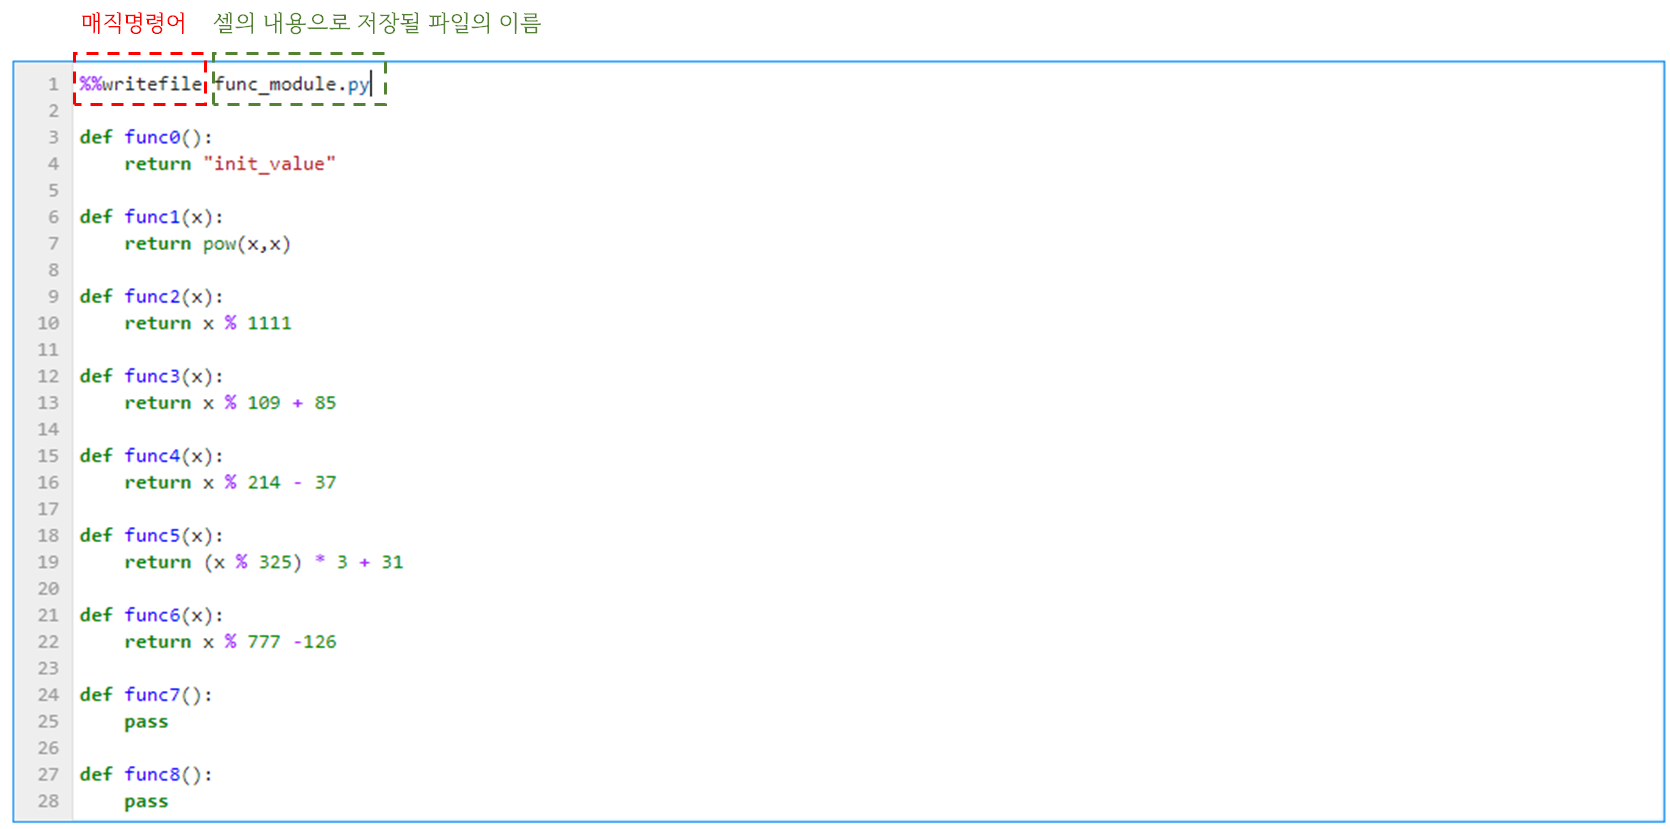

위처럼 함수가 모여있는 셀의 맨 위에다가 %%writefile 이라는 매직명령어를 적어줍니다.  
그 오른쪽에는 한칸 띄워서 저장될 파일의 이름을 정해주면 끝납니다!!

셀을 실행시켜볼까요?

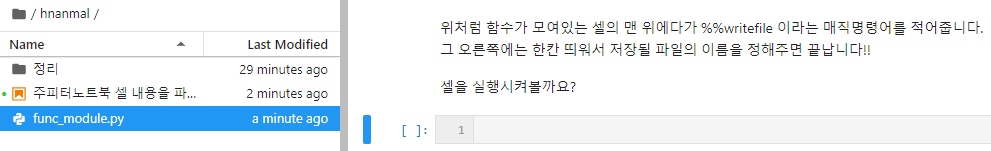

저는 지금 주피터 랩으로 시연 코드를 작성하고 있는데, 좌측의 디렉토리 창에 선명하게 "func_module.py" 파일이 등장한 것을 알 수 있습니다.  

파일을 더블클릭해서 내용이 잘 저장되었는지 확인해 볼게요.  

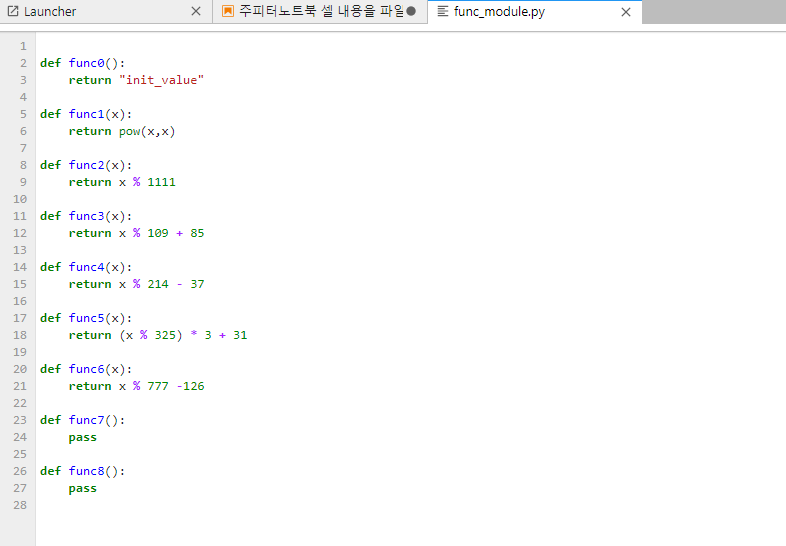

엄청나군요!!!  

파일을 저장하는 임무가 끝났으니, 이제 매직명령어는 주석 처리 해주셔도 좋습니다.

## 저장한 파일을 다시 import 하기

이제 모듈이 되어버린 아까의 함수 뭉치들을 한번 불러와 볼까요?

In [160]:
import func_module as fm

이렇게 입력해주면 끝입니다! 마지막에 'as fm' 이라고 함수모듈의 별칭을 세팅해준 이유는 조금 뒤에 알려드릴게요.  
모듈을 불러왔으니, 어떤 함수를 가진 모듈인지 그 목록을 보는 법도 알려드릴게요.

In [161]:
dir(fm)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'func0',
 'func1',
 'func2',
 'func3',
 'func4',
 'func5',
 'func6',
 'func7',
 'func8']

dir 함수로 fm 이라고 별칭을 정해둔 func_module이 갖고 있는 모든함수와 변수를 한번 조회해 봅시다.  
결과를 func0 부터 func8 까지 다 잘 출력되는 군요.  

참고로 모듈에 들어있는 함수를 호출하고 싶으면 "모듈이름.함수이름()"의 방법으로 호출해주면 됩니다.

In [162]:
fm.func0()

'init_value'

fm 모듈 속에 있는 func0을 호출했더니 성공적으로 'init_value' 를 호출했습니다!!  

이제 기존에 작성된 코드를 모듈 속 함수 호출 방법으로 수정해봐야겠군요!!

In [163]:
ascii_value = sum(map(lambda a: ord(a), fm.func0()))
pow_value = fm.func1(ascii_value)
remainder = fm.func2(pow_value)
chr(fm.func3(remainder)) + chr(fm.func4(remainder)) + chr(fm.func5(remainder)) + chr(fm.func6(remainder))

'love'

함수 이름 앞에 "fm."만 붙여주면 되니 수정도 오래 안걸리는군요.  
'love'라는 문구도 잘 출력됨을 알 수 있습니다.  
func_module의 짧은 문구로 바꾸어 준 것도 이제 이유를 아시겠죠?

## 개선된 방식으로 재작성된 코드를 감상하기

In [ ]:
def func0():
    return "init_value"

def func1(x):
    return pow(x,x)

def func2(x):
    return x % 1111

def func3(x):
    return x % 109 + 85

def func4(x):
    return x % 214 - 37

def func5(x):
    return (x % 325) * 3 + 31

def func6(x):
    return x % 777 -126

def func7():
    pass

def func8():
    pass

ascii_value = sum(map(lambda a: ord(a), func0()))
pow_value = func1(ascii_value)
remainder = func2(pow_value)
chr(func3(remainder)) + chr(func4(remainder)) + chr(func5(remainder)) + chr(func6(remainder))


In [ ]:
import func_module as fm

ascii_value = sum(map(lambda a: ord(a), fm.func0()))
pow_value = fm.func1(ascii_value)
remainder = fm.func2(pow_value)
chr(fm.func3(remainder)) + chr(fm.func4(remainder)) + chr(fm.func5(remainder)) + chr(fm.func6(remainder))

위의 두 셀 중, 첫번째 셀은 기존방식으로 작성한 셀이고,  
아래의 셀은 새롭게 적용한 모듈 호출 방식으로 작성한 셀입입니다.

한눈에 보기에도 코드 차이가 많이 나죠?  
이제 주피터로 코딩하면서, 라이브러리 구축도 시작할 수 있게 되셨습니다. 축하합니다!!!